In [14]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

from scipy import interp

from itertools import cycle

import seaborn as sns

In [1]:
dinner_track = pd.read_csv('./csv/dinner_track.csv')
party_track = pd.read_csv('./csv/party_track.csv')
sleep_track = pd.read_csv('./csv/sleep_track.csv')
workout_track = pd.read_csv('./csv/workout_track.csv')

NameError: name 'pd' is not defined

In [2]:
dinner_track.dtypes

NameError: name 'dinner_track' is not defined

In [17]:
dinner_track['playlist'] = 'dinner'
party_track['playlist'] = 'party'
sleep_track['playlist'] = 'sleep'
workout_track['playlist'] = 'workout'

In [18]:
frames = [dinner_track, party_track, sleep_track, workout_track]

result = pd.concat(frames)
result.drop(['id', 'name', 'artist', 'uri'], axis=1, inplace=True)
result.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,playlist
0,0.838,0.602,475680,0.302,0.9070,8,0.1130,-11.627,1,0.0427,119.758,4.0,0.300,dinner
1,0.873,0.571,290293,0.346,0.5190,0,0.0980,-12.569,0,0.0409,93.885,4.0,0.687,dinner
2,0.876,0.427,291862,0.287,0.8740,11,0.1330,-19.834,1,0.0346,104.407,4.0,0.467,dinner
3,0.714,0.644,340693,0.205,0.0482,10,0.0510,-16.005,1,0.0397,118.314,4.0,0.411,dinner
4,0.703,0.532,482360,0.364,0.6180,9,0.0602,-13.068,0,0.0297,127.166,4.0,0.271,dinner


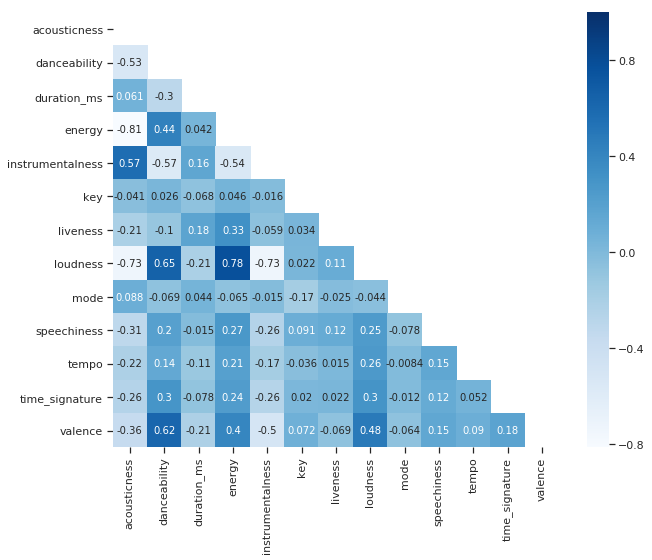

In [19]:
mask = np.zeros_like(result.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(result.corr(), mask=mask, annot=True, cmap="Blues")

In [20]:
result.isna().sum()

acousticness        0
danceability        1
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         1
tempo               0
time_signature      1
valence             1
playlist            0
dtype: int64

In [23]:
result.dropna(inplace=True)

In [24]:
result.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
playlist            0
dtype: int64

dinner     471
workout    363
sleep      362
party      280
Name: playlist, dtype: int64

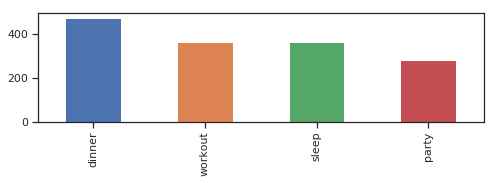

In [25]:
fig, ax = plt.subplots(figsize=(8,2))
ax = result.playlist.value_counts().plot.bar()

result.playlist.value_counts()

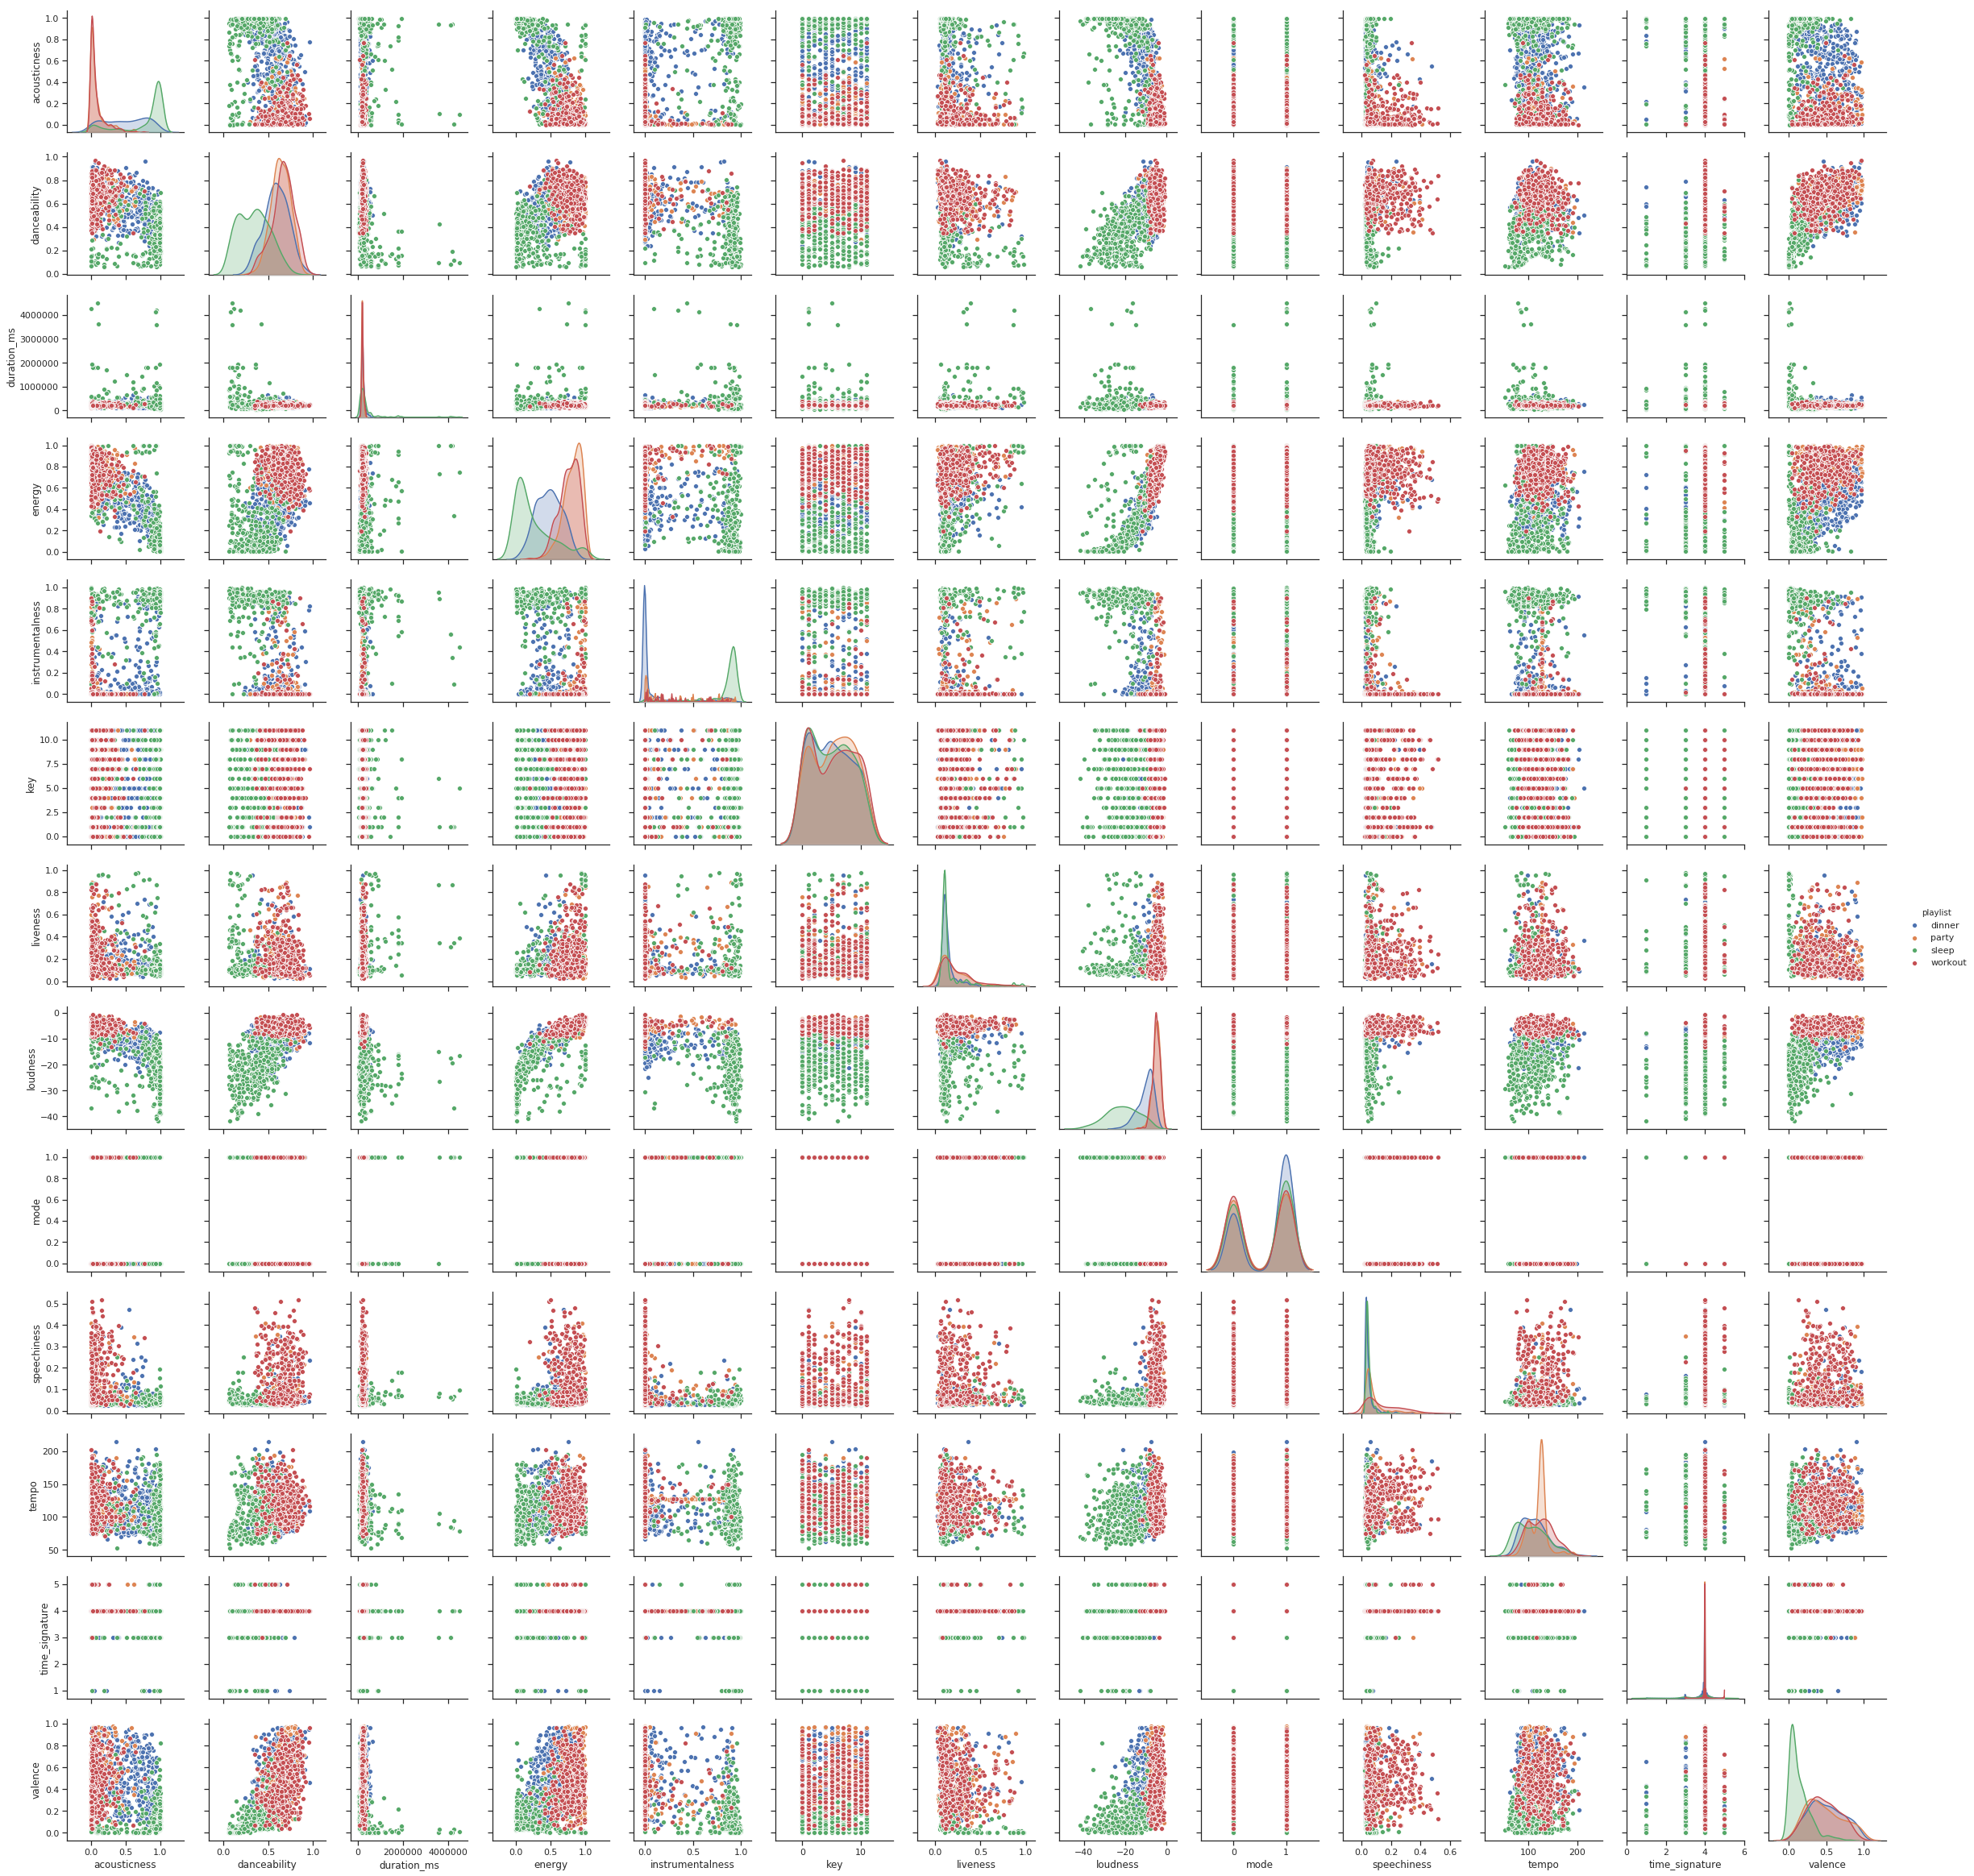

In [26]:
sns.set(style="ticks")

sns.pairplot(result, hue="playlist")